In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import fastf1.legacy

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.font_manager as fm

import pandas as pd

import seaborn as sns

In [2]:
ff1.Cache.enable_cache('Cache')

In [3]:
plotting.setup_mpl()

In [4]:
year = 2023
gp = 'Brazil'
event = 'R'

In [5]:
session = ff1.get_session(year, gp, event)

In [6]:
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future ve

In [7]:
session.laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:23.001000,1,NaT,1.0,0 days 00:16:38.183000,0 days 01:04:20.007000,NaT,0 days 00:01:00.960000,0 days 00:00:35.620000,NaT,...,SOFT,4.0,False,1,0 days 01:02:22.839000,Red Bull Racing,VER,24,False,2023-11-05 17:03:22.842
1,0 days 01:06:46.357000,1,0 days 00:02:23.356000,2.0,0 days 01:04:38.647000,0 days 01:06:43.349000,0 days 00:00:44.083000,0 days 00:01:03.234000,0 days 00:00:36.039000,0 days 01:05:07.084000,...,SOFT,5.0,False,2,0 days 01:04:23.001000,Red Bull Racing,VER,45,False,2023-11-05 17:05:23.004
2,0 days 01:32:11.479000,1,NaT,3.0,0 days 01:30:05.989000,NaT,NaT,0 days 00:00:49.786000,0 days 00:00:49.011000,NaT,...,SOFT,4.0,False,3,0 days 01:30:00.364000,Red Bull Racing,VER,1,False,2023-11-05 17:31:00.367
3,0 days 01:34:24.149000,1,0 days 00:02:12.670000,4.0,NaT,NaT,0 days 00:01:16.382000,0 days 00:00:38.838000,0 days 00:00:17.450000,0 days 01:33:27.861000,...,SOFT,5.0,False,3,0 days 01:32:11.479000,Red Bull Racing,VER,1,True,2023-11-05 17:33:11.482
4,0 days 01:35:39.894000,1,0 days 00:01:15.745000,5.0,NaT,NaT,0 days 00:00:19.651000,0 days 00:00:38.648000,0 days 00:00:17.446000,0 days 01:34:43.800000,...,SOFT,6.0,False,3,0 days 01:34:24.149000,Red Bull Racing,VER,1,True,2023-11-05 17:35:24.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,0 days 01:56:43.108000,24,0 days 00:01:16.767000,21.0,NaT,NaT,0 days 00:00:19.840000,0 days 00:00:39.276000,0 days 00:00:17.651000,0 days 01:55:46.181000,...,MEDIUM,6.0,True,4,0 days 01:55:26.341000,Alfa Romeo,ZHO,1,True,2023-11-05 17:56:26.344
1105,0 days 01:58:13.454000,24,0 days 00:01:30.346000,22.0,NaT,0 days 01:58:10.016000,0 days 00:00:19.797000,0 days 00:00:39.257000,0 days 00:00:31.292000,0 days 01:57:02.905000,...,MEDIUM,7.0,True,4,0 days 01:56:43.108000,Alfa Romeo,ZHO,1,False,2023-11-05 17:57:43.111
1106,0 days 01:04:23.001000,20,NaT,0.0,NaT,NaT,NaT,NaT,NaT,NaT,...,SOFT,1.0,True,1,0 days 01:02:22.839000,Haas F1 Team,MAG,24,False,2023-11-05 17:03:22.842
1107,0 days 01:04:23.001000,23,NaT,0.0,NaT,NaT,NaT,NaT,NaT,NaT,...,SOFT,4.0,False,1,0 days 01:02:22.839000,Williams,ALB,24,False,2023-11-05 17:03:22.842


In [8]:
fastest_lap_nor = session.laps.pick_driver('NOR').pick_fastest()
fastest_lap_ver = session.laps.pick_driver('VER').pick_fastest()

In [9]:
car_data_nor = fastest_lap_nor.get_car_data()
car_data_ver = fastest_lap_ver.get_car_data()

In [10]:
fastest_telemetry_nor = fastest_lap_nor.get_telemetry()
fastest_telemetry_ver = fastest_lap_ver.get_telemetry()

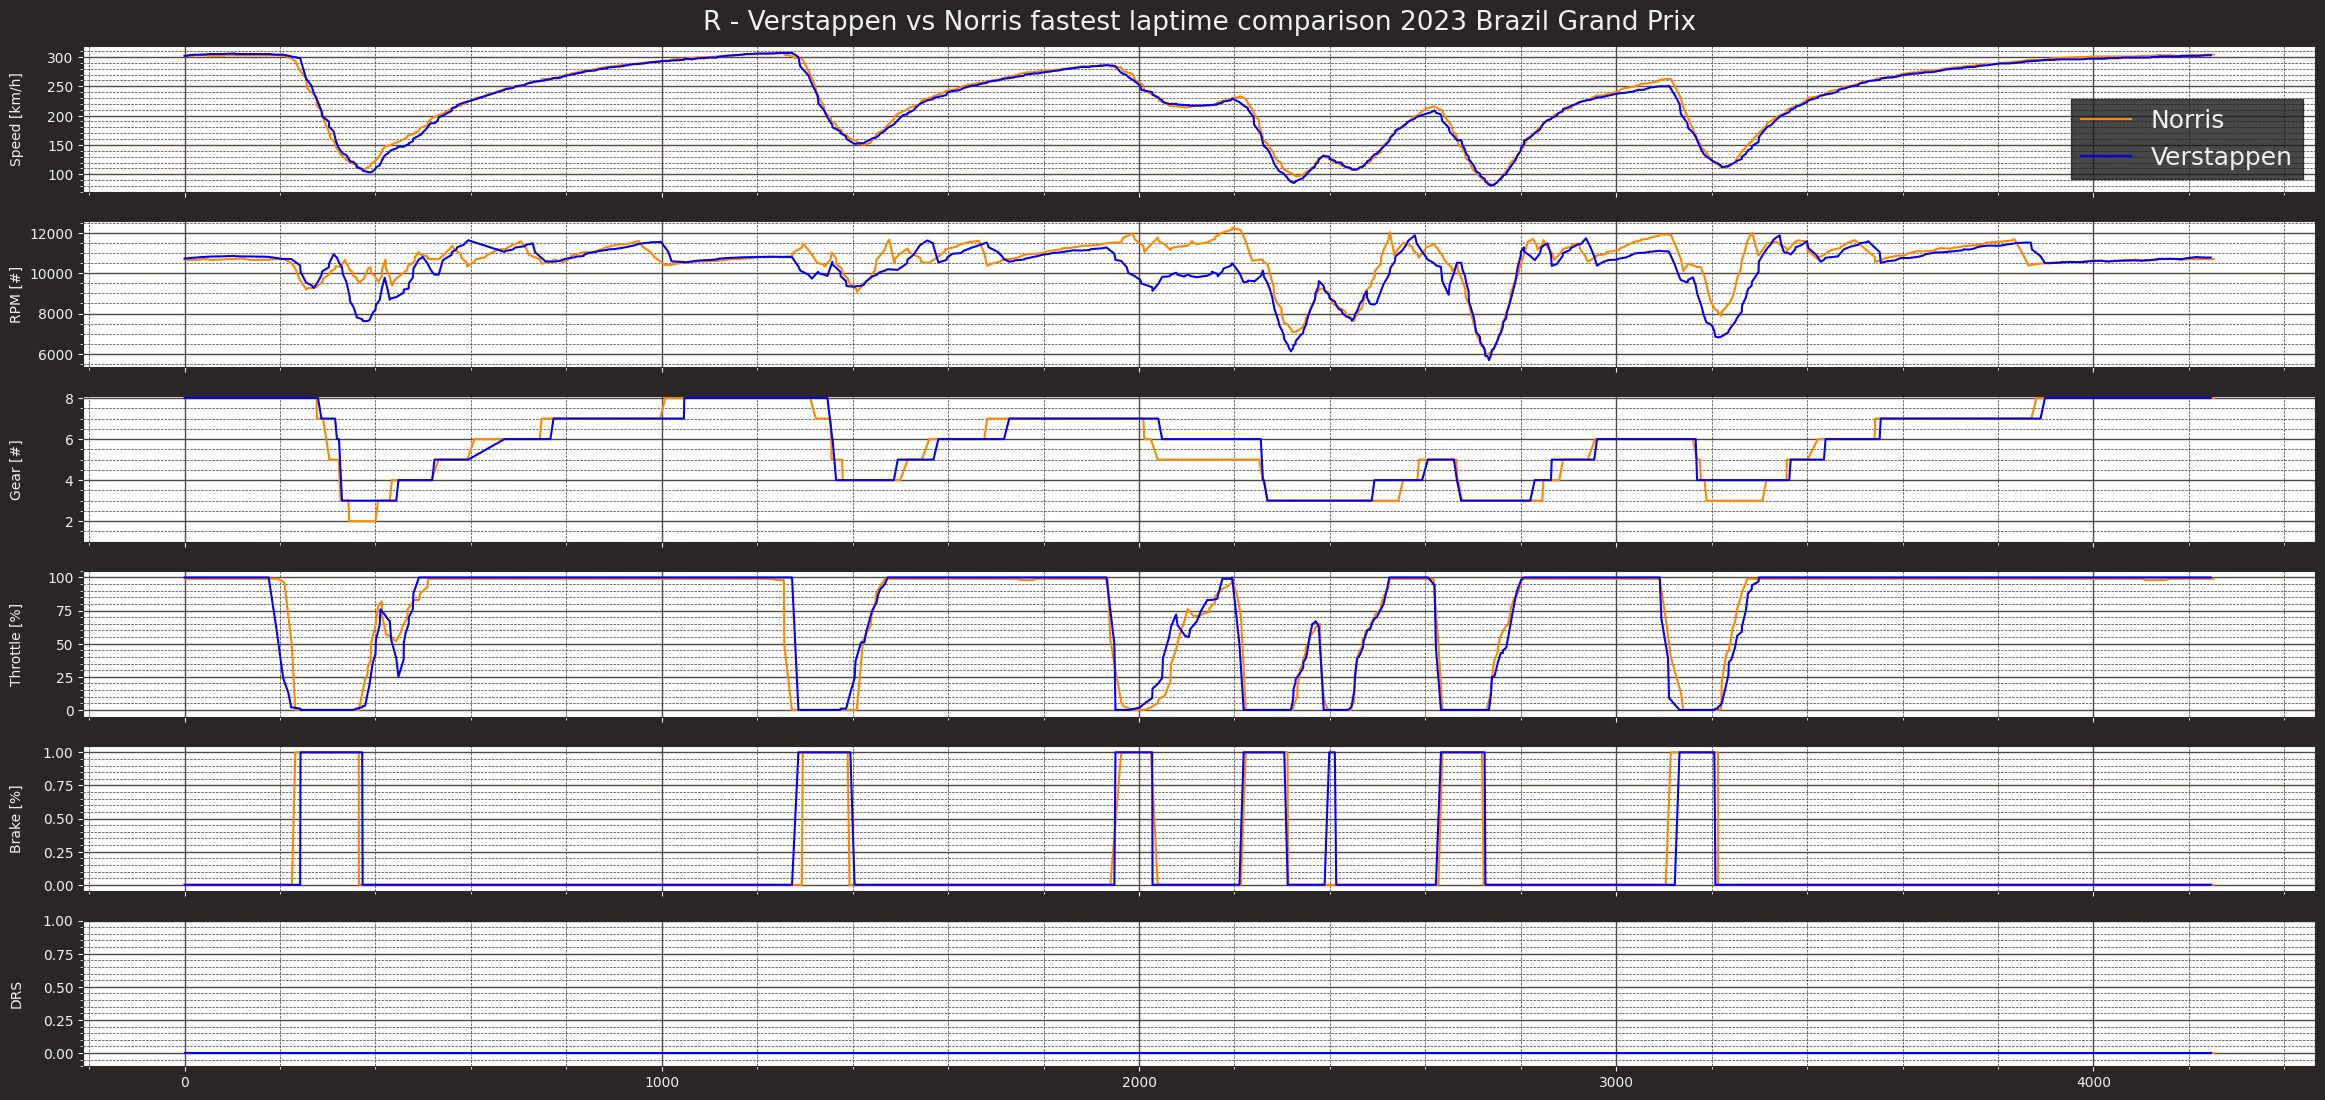

In [11]:
fig, ax = plt.subplots(6, figsize=(24, 12))

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[2].set_facecolor('white')
ax[3].set_facecolor('white')
ax[4].set_facecolor('white')
ax[5].set_facecolor('white')

ax[0].plot(fastest_telemetry_nor['Distance'], fastest_telemetry_nor['Speed'], color='#ff8700', label='Norris')
ax[0].plot(fastest_telemetry_ver['Distance'], fastest_telemetry_ver['Speed'], color='#0600ef', label='Verstappen')
ax[1].plot(fastest_telemetry_nor['Distance'], fastest_telemetry_nor['RPM'], color='#ff8700', label='Norris')
ax[1].plot(fastest_telemetry_ver['Distance'], fastest_telemetry_ver['RPM'], color='#0600ef', label='Verstappen')
ax[2].plot(fastest_telemetry_nor['Distance'], fastest_telemetry_nor['nGear'], color='#ff8700', label='Norris')
ax[2].plot(fastest_telemetry_ver['Distance'], fastest_telemetry_ver['nGear'], color='#0600ef', label='Verstappen')
ax[3].plot(fastest_telemetry_nor['Distance'], fastest_telemetry_nor['Throttle'], color='#ff8700', label='Norris')
ax[3].plot(fastest_telemetry_ver['Distance'], fastest_telemetry_ver['Throttle'], color='#0600ef', label='Verstappen')
ax[4].plot(fastest_telemetry_nor['Distance'], fastest_telemetry_nor['Brake'], color='#ff8700', label='Norris')
ax[4].plot(fastest_telemetry_ver['Distance'], fastest_telemetry_ver['Brake'], color='#0600ef', label='Verstappen')
ax[5].plot(fastest_telemetry_nor['Distance'], fastest_telemetry_nor['DRS'], color='#ff8700', label='Norris')
ax[5].plot(fastest_telemetry_ver['Distance'], fastest_telemetry_ver['DRS'], color='#0600ef', label='Verstappen')

ax[0].set_ylabel('Speed [km/h]')
ax[1].set_ylabel('RPM [#]')
ax[2].set_ylabel('Gear [#]')
ax[3].set_ylabel('Throttle [%]')
ax[4].set_ylabel('Brake [%]')
ax[5].set_ylabel('DRS')

ax[0].get_xaxis().set_ticklabels([])
ax[1].get_xaxis().set_ticklabels([])
ax[2].get_xaxis().set_ticklabels([])
ax[3].get_xaxis().set_ticklabels([])
ax[4].get_xaxis().set_ticklabels([])

ax[2].set_ylim(1,8.1)
ax[5].set_ylim(-0.1,1)

fig.align_ylabels()

ax[0].legend(fontsize=18)

title = f'{str(event)} - Verstappen vs Norris fastest laptime comparison {str(year)} {str(gp)} Grand Prix'
ax[0].title.set_text(title)

fig.savefig(f'Figures/{title}.png')

plt.subplots_adjust(left=0.06, right=0.99, top=0.9, bottom=0.05)